# Ligand Preparation
1. Replace or recalculate the molecule name
2. Disconnect simple metal salts drawn in covalent notation
3. Remove minor components (e.g. counterions and solvent molecules), optionally storing the removed components in an alternate field
4. Rebalance protonation states by deprotonating strong acids and/or protonating strong bases
5. Add explicit hydrogen atoms, or remove safely-deletable explicit hydrogen atoms
6. Replace the atomic coordinates with an aesthetic 2D depiction layout
7. Enumerate tautomers and possibly also protonation states
8. Filter enumerated structures according to strong acid/base rules

In [74]:
from rdkit.Chem.Draw import IPythonConsole

# Standardize SMILES

In [75]:
from molvs import standardize_smiles

In [76]:
standardize_smiles('[Na]OC(=O)c1ccc(C[S+2]([O-])([O-]))cc1')

'O=C([O-])c1ccc(C[S](=O)=O)cc1.[Na+]'

In [77]:
standardize_smiles('C1CCCCN1')

'C1CCNCC1'

In [78]:
standardize_smiles("OC(=O)C(=O)O.Fc1ccc(cc1)C(=O)C2CCN(CCC3Cc4sccc4C3=O)CC2")

'O=C(O)C(=O)O.O=C(c1ccc(F)cc1)C1CCN(CCC2Cc3sccc3C2=O)CC1'

# Protonation

In [79]:
from rdkit import Chem

In [80]:
mol = Chem.MolFromSmiles('C1CCCCN1')
print("before:", Chem.MolToSmiles(mol))
# find index of nitrogen
nIdx = mol.GetSubstructMatch(Chem.MolFromSmarts('N'))
# set the nitrogen atom's formal charge to 1
mol.GetAtomWithIdx(*nIdx).SetFormalCharge(1)
# print the protonated SMILES
print("after :", Chem.MolToSmiles(mol))

before: C1CCNCC1
after : C1CC[NH2+]CC1


In [81]:
# CHEMBL120903
sp2N = Chem.MolFromSmarts("[NX3]")
mol= Chem.MolFromSmiles("Fc1ccc(cc1)C(=O)C2CCN(CC3CC(=O)c4c(C3)[nH]c5ccccc45)CC2")
print("before:", Chem.MolToSmiles(mol))
nIdx = mol.GetSubstructMatch(sp2N)
mol.GetAtomWithIdx(*nIdx).SetFormalCharge(1)
print("after :", Chem.MolToSmiles(mol))

before: O=C1CC(CN2CCC(C(=O)c3ccc(F)cc3)CC2)Cc2[nH]c3ccccc3c21
after : O=C1CC(C[NH+]2CCC(C(=O)c3ccc(F)cc3)CC2)Cc2[nH]c3ccccc3c21


# Desalting

In [82]:
from rdkit.Chem.SaltRemover import SaltRemover

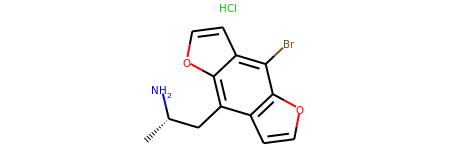

In [83]:
# CHEMBL263083
mol_HCl_salt = Chem.MolFromSmiles("Cl.C[C@H](N)Cc1c2occc2c(Br)c3occc13")
mol_HCl_salt

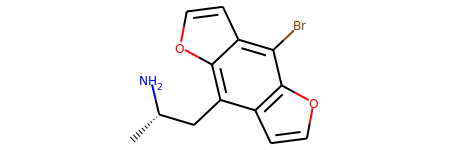

In [84]:
SaltRemover().StripMol(mol_HCl_salt,dontRemoveEverything=True)

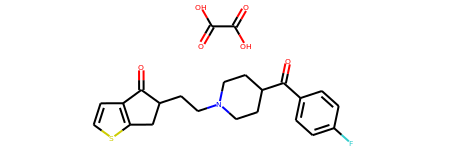

In [85]:
# CHEMBL92673
mol_oxalate_salt = Chem.MolFromSmiles("OC(=O)C(=O)O.Fc1ccc(cc1)C(=O)C2CCN(CCC3Cc4sccc4C3=O)CC2")
mol_oxalate_salt

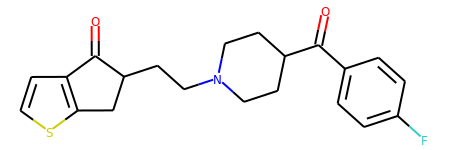

In [86]:
SaltRemover().StripMol(mol_oxalate_salt,dontRemoveEverything=True)